# Heart Disease Risk Analysis
* **Risk Analysis and Prediction of future coronary heart disease (CHD) based on cardiovascular study on residents of the town of Framingham, Massachusetts.**
* **The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.**
> Above info is obtained from the information provided alongwith the dataset.
* **For this dataset, we will be using Logistic Regression and Decision Trees for predictions.**

## Major Headings:
* *Part 1:*
    * **Data Preprocessing and Visualization**
    * **Model Building (using Logistic Regression)**
    * **Improving Recall (Sensitivity)**
* *Part 2:*
    * **Preprocessing using Backward Elimination Method**
* *Part 3:*
    * **Using Decision Trees**
* *Part 4:*
    * **Using Random Forest classifier**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


#### Loading Dataset:

In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Data Preprocessing and Visualization

In [3]:
data=df.copy()
data.shape

(4238, 16)

### Null Value and cardinality check:

In [4]:
null_perc=data.isnull().sum()/len(data)*100
null=data.isnull().sum()
overview=pd.concat((null,null_perc,data.nunique()),axis=1, keys=['Null counts','Null %','Cardinality'])
overview.T

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Null counts,0.0,0.0,105.000000,0.0,29.000000,53.00000,0.0,0.0,0.0,50.000000,0.0,0.0,19.000000,1.000000,388.000000,0.0
Null %,0.0,0.0,2.477584,0.0,0.684285,1.25059,0.0,0.0,0.0,1.179802,0.0,0.0,0.448325,0.023596,9.155262,0.0
Cardinality,2.0,39.0,4.000000,2.0,33.000000,2.00000,2.0,2.0,2.0,248.000000,234.0,146.0,1363.000000,73.000000,143.000000,2.0


*Inference:*
* We observe that the % null values for all columns are very less compared to size of data, (<10%)

* For **categorical** data, we will update null values to the **most dominant** category value.
* For **non-categorical** data, we will apply **Linear Interpolation** to that column.
> **For Categorical Data**, we **can not use interpolation** **because** Interpolation requires a mathematical relationship between data points that can be used to estimate missing values, but **categorical data does not have a natural mathematical relationship.**

In [5]:
# generating list of categorical factors:
temp=data.drop(columns=['TenYearCHD']).nunique()
cat=temp.loc[temp.values <5].index.to_list()

# updating null values to the most dominant category:
for factor in cat:
    data[factor].fillna(data[factor].value_counts().idxmax(),inplace=True)

In [6]:
# generating list of non-categorical factors:
temp=data.drop(columns=['TenYearCHD']).nunique()
non_cat=temp.loc[temp.values > 5].index.to_list()

# Implementing interpolation (with linear method), on known data for null values:
for factor in non_cat:
    data[factor]=data[factor].interpolate(method='linear')

In [7]:
null_perc=data.isnull().sum()/len(data)*100
null=data.isnull().sum()
overview=pd.concat((null,null_perc,data.nunique()),axis=1, keys=['Null counts','Null %','Cardinality'])
overview.T

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Null counts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cardinality,2.0,39.0,4.0,2.0,41.0,2.0,2.0,2.0,2.0,274.0,234.0,146.0,1375.0,73.0,231.0,2.0


* **No Null values left**

In [8]:
data_clean=data.copy()

### Analysis of Density Distribution of Factors:

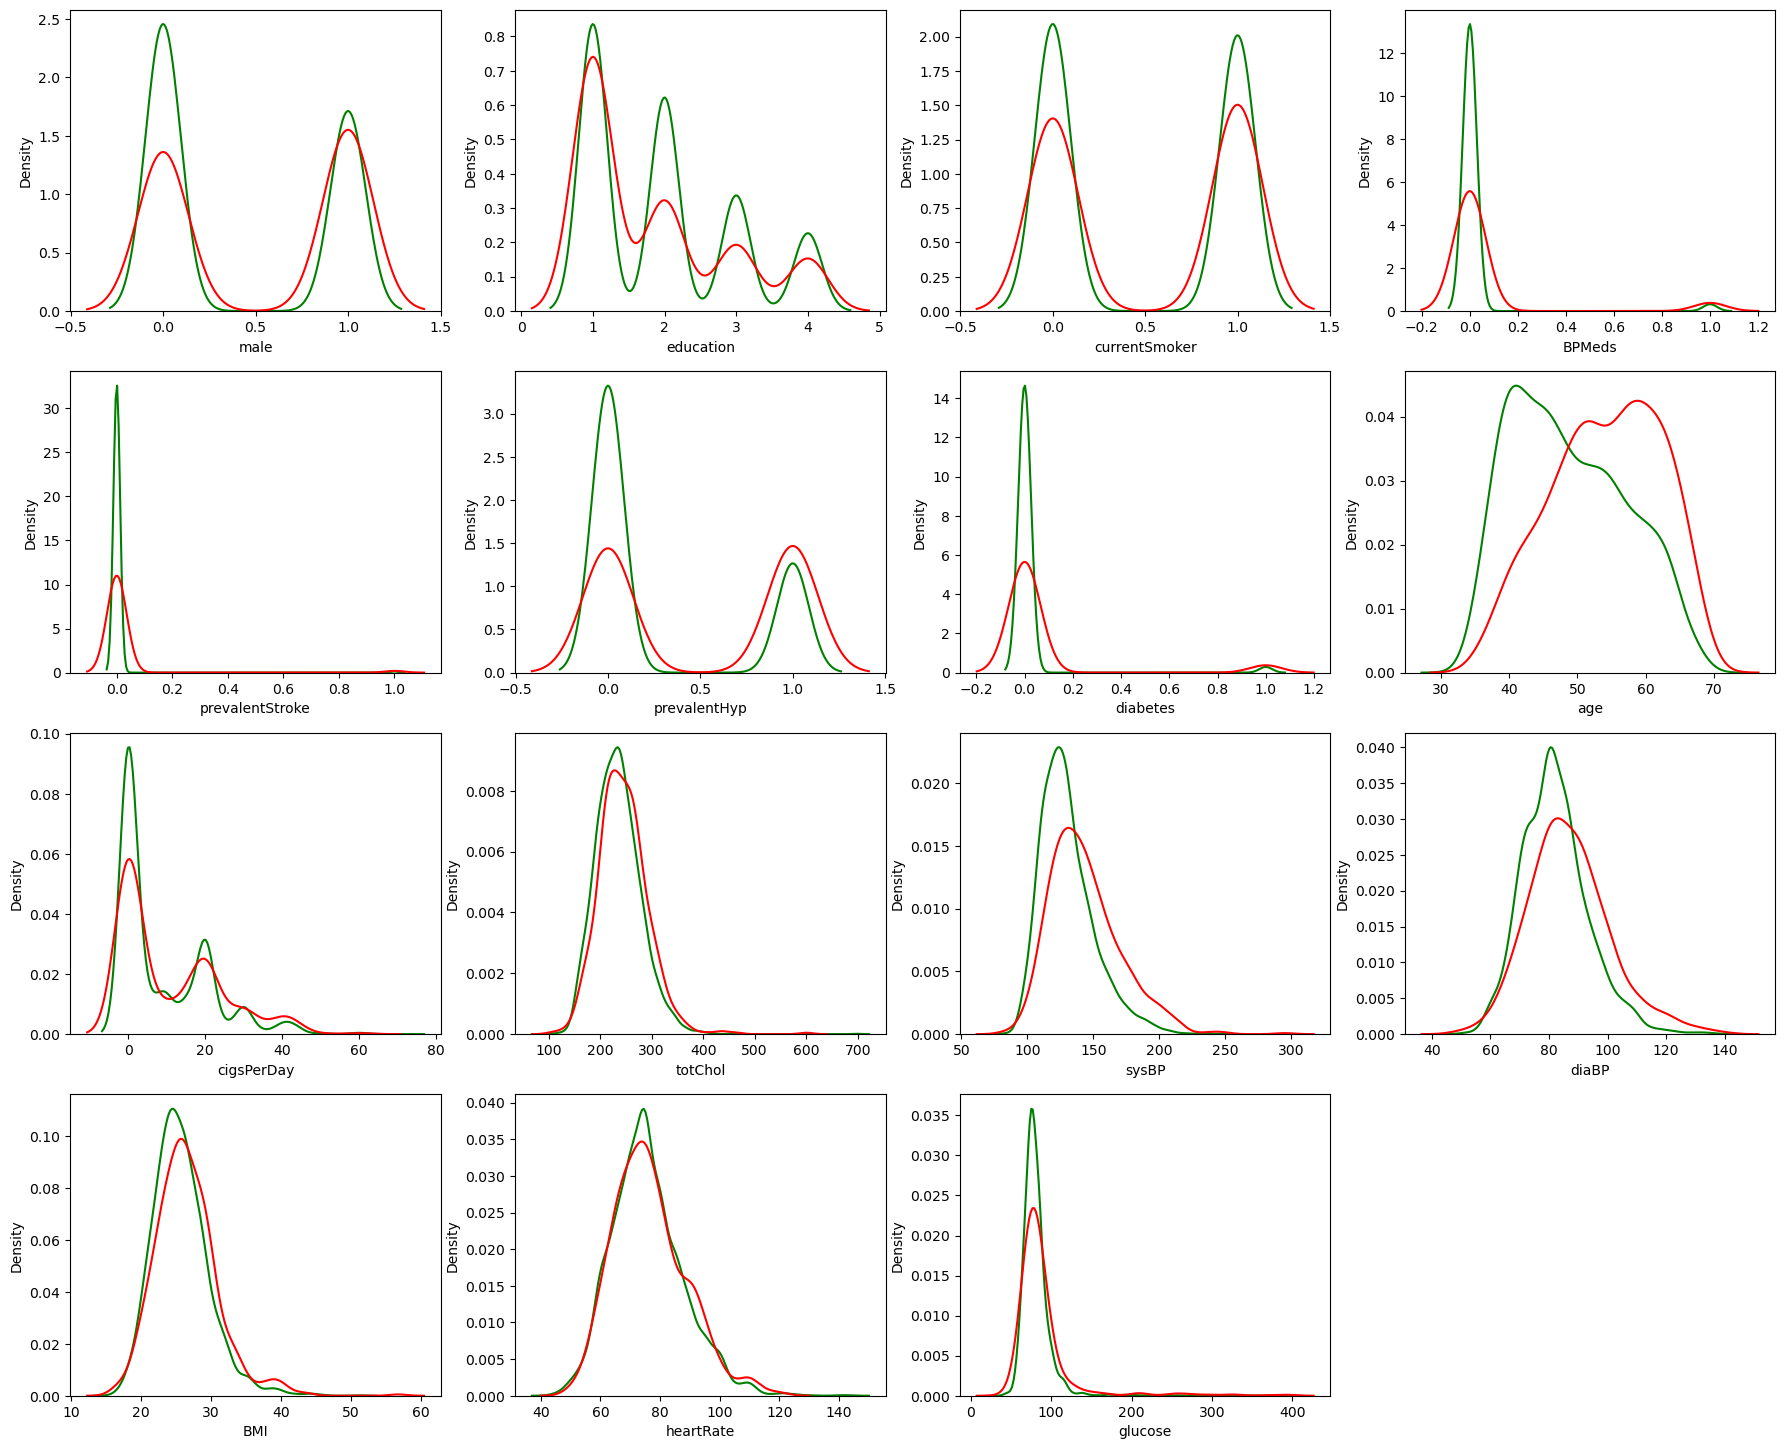

In [9]:
fac=cat+non_cat
plt.figure(figsize=(22,18))
i=1
for factor in fac:
    plt.subplot(4,4,i)
    sns.distplot(data[factor].loc[data['TenYearCHD']==0], hist=False,color='green')
    sns.distplot(data[factor].loc[data['TenYearCHD']==1], hist=False,color='red')
    i+=1

* *Inference:*
    * **diabetes**, **BPMeds** and **prevalentStroke** are categorical factors (with 2 classes), and they are **highly imbalanced.** Such that one type of class is looking like **outlier.** (**minority class's** data points **are too small compared to the majority class.**)
        * For **imbalanced features**, instead of dropping, we will apply **SMOTE(Synthetic-Minority-OverSampling-Technique)**
> SMOTE: A popular **minority oversampling method** used to address the class imbalance problem in classification models.
    * **BMI**, **heartRate** and **totChol** are non-categorical factors, and they are **highly balanced**.
    * **Male audience** had **more** chances of being **affected** by CHD.
    * Higher values of **sysBP and diaBP** had more cases of CHD.
    * People of **age >50** are more **prone** to CHD.

### Correlation Analysis:

In [10]:
# Checking correlation % with target column:
data.corrwith(data['TenYearCHD'])*100

male                 8.842757
age                 22.525610
education           -5.281226
currentSmoker        1.945627
cigsPerDay           5.787081
BPMeds               8.641714
prevalentStroke      6.180995
prevalentHyp        17.760273
diabetes             9.731651
totChol              8.256616
sysBP               21.642904
diaBP               14.529910
BMI                  7.366877
heartRate            2.290313
glucose             11.804604
TenYearCHD         100.000000
dtype: float64

<AxesSubplot:>

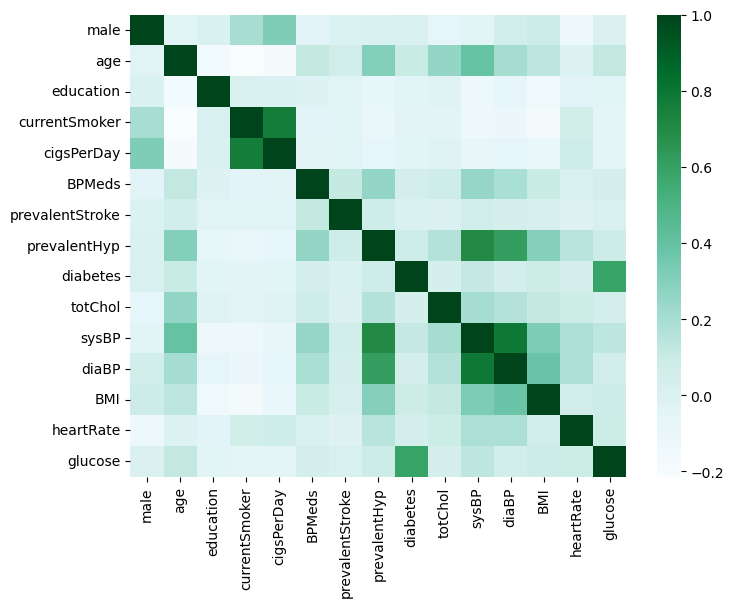

In [11]:
corr=data.drop(columns=['TenYearCHD']).corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr, cmap='BuGn')

* *Inferences:*
    * **sysBP**, **diaBP** and **prevalentHyp** have high correlation.
    * **cigsPerDay** and **currentSmoker** have high correlation.
    * **glucose** and **diabetes** have high correlation.

In [12]:
# dropping factors according to inferences:
data.drop(columns=['diaBP','prevalentHyp','currentSmoker','diabetes'], inplace=True)
data.shape

(4238, 12)

<AxesSubplot:>

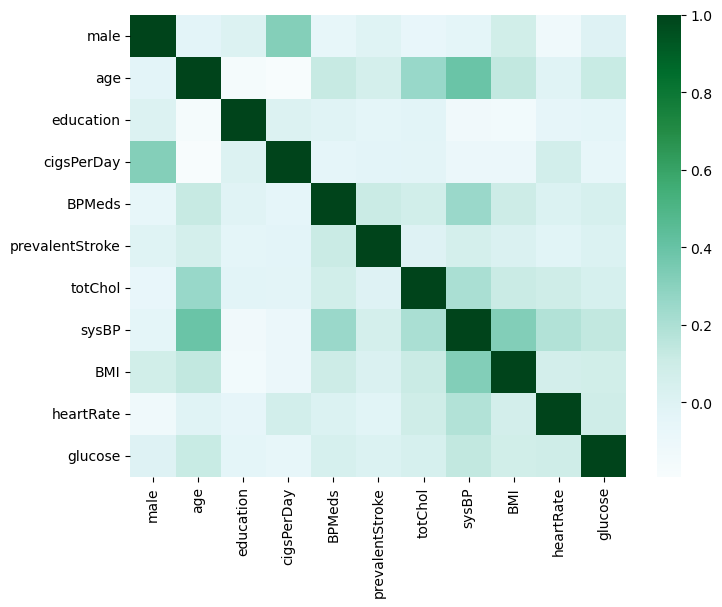

In [13]:
corr=data.drop(columns=['TenYearCHD']).corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr, cmap='BuGn')

*Inferences:* **No high correlations left**

# Model Building

### X-Y split:

In [14]:
X=data.drop(columns=['TenYearCHD'])
Y=data.TenYearCHD
# to ensure proper split:
data.shape,X.shape,Y.shape

((4238, 12), (4238, 11), (4238,))

### Train-Test Split:

In [15]:
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.2,random_state=1500)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3390, 11), (3390,), (848, 11), (848,))

### Applying SMOTE on training data:
* To correct **imbalanced features**

In [16]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE:
smote=SMOTE(random_state=500, sampling_strategy=0.25)
# sampling stratergy: ratio of (minority values)/(majority values), currently set to: 0.25 (1/4 ratio)
x_train_resample,y_train_resample=smote.fit_resample(x_train, y_train)

### Fitting in logistic regression model:

We are using **statsmodels**

In [17]:
import statsmodels.api as sm
logReg=sm.Logit(y_train_resample, sm.add_constant(x_train_resample)).fit()

Optimization terminated successfully.
         Current function value: 0.454891
         Iterations 6


### Performance Metrices:

* *In case of classification problems, there are certain defined performance metrices:*
    * **Confusion Matrix**
    * **Precision and Recall**
    * **Accuracy**
* Because, here, metrices like **mean square error** and **mean absolute error** will not represent performace of the model correctly.

In [18]:
model=[]
ac=[]

In [19]:
# importing performance metrices:
from sklearn.metrics import classification_report as report
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import confusion_matrix as conf

In [20]:
# Generaing Predictions:
# predicted values:
y_pred=logReg.predict(sm.add_constant(x_test))
y_pred
# here, logReg.predict(), gave probabilities instead of binary values
# because, in statsmodels, there is no default threshold value fixed for regression.
# hence we have to define our own threshold and convert probabilities to binary.

4202    0.108623
2192    0.144175
1996    0.108107
3001    0.206453
3883    0.372218
          ...   
3484    0.300504
2320    0.141846
3649    0.127231
3118    0.101590
1525    0.142641
Length: 848, dtype: float64

#### Converting probabilities into binary values:

In [21]:
# Setting Threshold value:
# let threshold = t
t=0.5
# converting probabilities to binary values (as per threshold):
y_pred_binary=np.where(y_pred.values >= t, 1, 0)

#### Confusion Matrix:

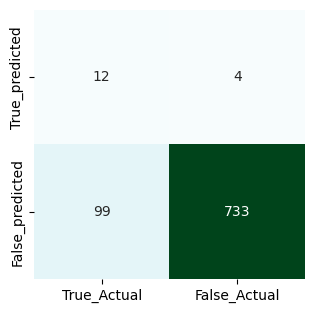

In [22]:
cm=conf(y_test,y_pred_binary)
cm[0][0],cm[1][1]=cm[1][1],cm[0][0]
cm=pd.DataFrame(cm,index=['True_predicted','False_predicted'],columns=['True_Actual','False_Actual'])

plt.subplots(figsize=(3.5,3.5))
sns.heatmap(cm,cmap='BuGn',annot=True,fmt='.0f',cbar=False)
plt.show()

#### Accuracy, Recall and Precision:

In [23]:
print("Accuracy:",accuracy(y_test,y_pred_binary)*100,"%")
print("Recall:",recall(y_test,y_pred_binary)*100,"%")
print("Precision:",precision(y_test,y_pred_binary)*100,"%")

Accuracy: 87.85377358490565 %
Recall: 10.81081081081081 %
Precision: 75.0 %


In [24]:
model.append('LogReg')
ac.append(accuracy(y_test,y_pred_binary)*100)

* *Observations:*
    * Our Model is currently **more selective than sensitive** in nature, as **precision > recall**.

* In case of any disease detection, **Recall** is a very significant metric.
* Because **False Negative** detections can be **fatal** for the life of person.
* Hence our aim is to **improve** the **recall metric (or sensitivity)** of our model.

* In order to make model more sensetive to the **Risk**:
    *  **We need to lower the threshold of our model**
    * we have used initial threshold as **0.5**
    * We have to carefully **lower our threshold** to some value, such that recall becomes significantly higher, without heavily hampering accuracy.

# Improving Recall (sensitivity):

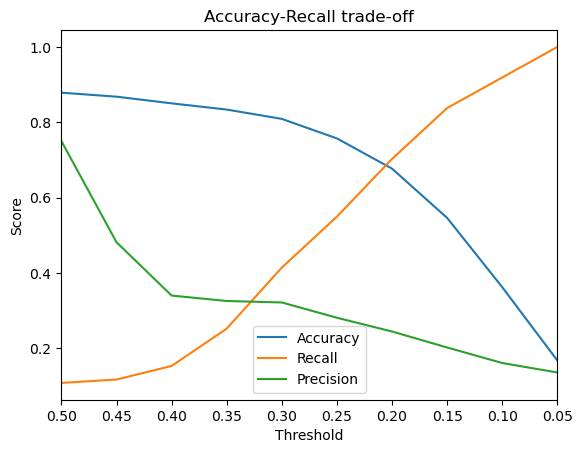

In [25]:
y_pred_binary_curr=y_pred_binary
# plotting threshold against, accuracy, recall and precision:
threshold=[0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15,0.10,0.05]
rec=[]
acc=[]
pre=[]

for t in threshold:
    y_pred_binary_curr=np.where(y_pred >= t, 1, 0)
    acc.append(accuracy(y_test,y_pred_binary_curr))
    rec.append(recall(y_test,y_pred_binary_curr))
    pre.append(precision(y_test,y_pred_binary_curr))
    
plt.plot(threshold,acc,label='Accuracy')
plt.plot(threshold,rec,label='Recall')
plt.plot(threshold,pre,label='Precision')
plt.xlim(max(threshold), min(threshold))
plt.title("Accuracy-Recall trade-off")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

* *Inferences:*
    * **Accuracy decreases exponentially**, with decrease in threshold.
    * **Precision decreases linearly**, with decrease in threshold.
    * **Recall increases linearly**, with decrease in threshold.
* **Most suitable value of threshold is somewhere around 0.3**

In [26]:
# Updating threshold:
t=0.3
y_pred_binary_curr=np.where(y_pred.values >= t, 1, 0)

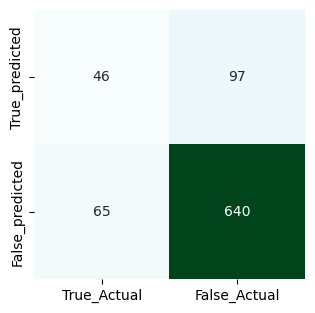

In [27]:
cmat=conf(y_test,y_pred_binary_curr)
cmat[0][0],cmat[1][1]=cmat[1][1],cmat[0][0]
cmat=pd.DataFrame(cmat,index=['True_predicted','False_predicted'],columns=['True_Actual','False_Actual'])
plt.subplots(figsize=(3.5,3.5))
sns.heatmap(cmat,cmap='BuGn',annot=True,fmt='.0f',cbar=False)
plt.show()

In [28]:
print("Accuracy:",accuracy(y_test,y_pred_binary_curr)*100,"%")
print("Recall:",recall(y_test,y_pred_binary_curr)*100,"%")
print("Precision:",precision(y_test,y_pred_binary_curr)*100,"%")

Accuracy: 80.89622641509435 %
Recall: 41.44144144144144 %
Precision: 32.16783216783217 %


* *Conclusions:*
    * **Maximum accuracy** obtained by our model was around **88%** at initial threshold **t=0.5**
    * But our **recall**(sensitivity) metric was **very low** **7%** at **t=0.5**.
    * Hence we had to **trade-off** some **accuracy** in order to make our model **more sensetive.** (i.e. to **increase Recall**)
    * We have finally at **t=0.3**, obtained a significant **41% recall** with **80% accuracy**. (A very fair trade-off)
    * We can further **decrease threshold** in order to make model **more sensitive than selective.**
* **Different models like DTrees, SVM or Neural Nets can be used for better Accuracy and Sensitivity.**

# Preprocessing using Backward Elimination Method

* In this method, **we will simply fit already cleaned data into the logistic regression model.**
* Then we will calculate the p-values of all features, **drop the feature with highest p-value**.
* We will keep **repeating step above 2 steps** till **all the p-values of remaining data becomes <= 0.05**

In [29]:
data_clean.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [30]:
Xn=data_clean.drop(columns=['TenYearCHD'])
Yn=data_clean.TenYearCHD

Xn_train,Xn_test,Yn_train,Yn_test=tts(Xn,Yn,test_size=0.2, random_state=500)

reg=sm.Logit(Yn_train, sm.add_constant(Xn_train)).fit()

curr=reg.pvalues.max()

while(curr>0.05):
    # dropping maxm pvalued label:
    label=reg.pvalues.idxmax()
    print(label,":",curr)
    data_clean.drop(columns=[label], inplace=True)
    # fitting updated data:
    Xn=data_clean.drop(columns=['TenYearCHD'])
    Yn=data_clean.TenYearCHD
    Xn_train,Xn_test,Yn_train,Yn_test=tts(Xn,Yn,test_size=0.2, random_state=500)
    reg=sm.Logit(Yn_train, sm.add_constant(Xn_train)).fit()
    curr=reg.pvalues.max()


Optimization terminated successfully.
         Current function value: 0.384940
         Iterations 7
currentSmoker : 0.9901301794125181
Optimization terminated successfully.
         Current function value: 0.384940
         Iterations 7
education : 0.9146164102701849
Optimization terminated successfully.
         Current function value: 0.384942
         Iterations 7
diaBP : 0.8130501356555632
Optimization terminated successfully.
         Current function value: 0.384950
         Iterations 7
heartRate : 0.7866378376508116
Optimization terminated successfully.
         Current function value: 0.384961
         Iterations 7
BMI : 0.36957409324051915
Optimization terminated successfully.
         Current function value: 0.385080
         Iterations 7
diabetes : 0.3859803286896841
Optimization terminated successfully.
         Current function value: 0.385189
         Iterations 7
prevalentHyp : 0.25974508828252474
Optimization terminated successfully.
         Current function value: 

In [31]:
data_clean.shape

(4238, 9)

In [32]:
reg.pvalues

const              2.925578e-68
male               2.330902e-05
age                1.039077e-23
cigsPerDay         3.564594e-08
BPMeds             1.486011e-02
prevalentStroke    4.957512e-02
totChol            4.407141e-02
sysBP              1.470953e-08
glucose            1.932921e-05
dtype: float64

*Inference*: **Now all features have p-value < 0.05, hence, we will not drop anything** and check metrices.

In [33]:
Yn_pred=reg.predict(sm.add_constant(Xn_test))
Yn_pred

3236    0.056673
1316    0.117131
574     0.104045
3412    0.032471
2679    0.112841
          ...   
2313    0.112124
3401    0.258430
232     0.104771
2260    0.053868
387     0.125385
Length: 848, dtype: float64

In [34]:
# at threshold t
t=0.5
Yn_pred_binary=np.where(Yn_pred >= t, 1, 0)
Yn_pred_binary.shape,Yn_test.shape

((848,), (848,))

In [35]:
print("Accuracy%:",accuracy(Yn_test,Yn_pred_binary)*100)
print("Recall%:",recall(Yn_test,Yn_pred_binary)*100)

Accuracy%: 86.55660377358491
Recall%: 7.6923076923076925


In [36]:
# decresaing threshold:
t=0.3
Yn_pred_binary=np.where(Yn_pred >= t, 1, 0)
Yn_pred_binary.shape,Yn_test.shape

print("Accuracy%:",accuracy(Yn_test,Yn_pred_binary)*100)
print("Recall%:",recall(Yn_test,Yn_pred_binary)*100)

Accuracy%: 83.13679245283019
Recall%: 28.205128205128204


*Observation*:
* we got **similar results as earlier**, **even after using backward elimination method**

# Using Decision Trees

We will not do preprocessing again, we will use the **already preprocessed** and **train-test-splitted** data. (i.e. **x_train_resample**, **y_train_resample**)

In [37]:
from sklearn import tree

clf=tree.DecisionTreeClassifier(max_depth=4).fit(x_train_resample,y_train_resample)
clf.score(x_test,y_test)*100

87.61792452830188

#### DTree Criterion and Splitter analysis:

In [38]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(x_train_resample,y_train_resample)

DecisionTreeClassifier(max_depth=4)

In [39]:
print("Accuracy%:",clf.score(x_test,y_test)*100)

Accuracy%: 87.61792452830188


### HyperParameter Tuning:

In [40]:
from sklearn.model_selection import GridSearchCV

param = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}

In [41]:
gridsearch = GridSearchCV(estimator=clf,param_grid=param).fit(x_train_resample,y_train_resample)
grid_df=pd.DataFrame(gridsearch.cv_results_)
grid_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
mean_fit_time,0.004513,0.005907,0.007531,0.009016,0.010182,0.011738,0.013188,0.014535,0.015809,0.017005,0.004542,0.006195,0.007869,0.009635,0.011416,0.013129,0.014629,0.01634,0.017701,0.019727
std_fit_time,0.000146,0.000089,0.000149,0.000324,0.000124,0.000225,0.000093,0.000245,0.000194,0.000203,0.000031,0.000116,0.00014,0.000049,0.000166,0.000136,0.000098,0.000291,0.000187,0.001469
mean_score_time,0.002122,0.002242,0.002362,0.002262,0.002206,0.002258,0.002305,0.002305,0.00264,0.002341,0.001996,0.002136,0.002183,0.002254,0.002318,0.002345,0.002349,0.002402,0.002369,0.002464
std_score_time,0.000216,0.000175,0.000307,0.00008,0.000021,0.000021,0.000025,0.000066,0.000598,0.00003,0.000031,0.000077,0.000025,0.000044,0.000055,0.000085,0.000056,0.000095,0.000086,0.000204
param_criterion,gini,gini,gini,gini,gini,gini,gini,gini,gini,gini,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy
param_max_depth,1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10
params,"{'criterion': 'gini', 'max_depth': 1}","{'criterion': 'gini', 'max_depth': 2}","{'criterion': 'gini', 'max_depth': 3}","{'criterion': 'gini', 'max_depth': 4}","{'criterion': 'gini', 'max_depth': 5}","{'criterion': 'gini', 'max_depth': 6}","{'criterion': 'gini', 'max_depth': 7}","{'criterion': 'gini', 'max_depth': 8}","{'criterion': 'gini', 'max_depth': 9}","{'criterion': 'gini', 'max_depth': 10}","{'criterion': 'entropy', 'max_depth': 1}","{'criterion': 'entropy', 'max_depth': 2}","{'criterion': 'entropy', 'max_depth': 3}","{'criterion': 'entropy', 'max_depth': 4}","{'criterion': 'entropy', 'max_depth': 5}","{'criterion': 'entropy', 'max_depth': 6}","{'criterion': 'entropy', 'max_depth': 7}","{'criterion': 'entropy', 'max_depth': 8}","{'criterion': 'entropy', 'max_depth': 9}","{'criterion': 'entropy', 'max_depth': 10}"
split0_test_score,0.8,0.8,0.798601,0.795804,0.798601,0.784615,0.79021,0.787413,0.759441,0.758042,0.8,0.8,0.798601,0.797203,0.795804,0.773427,0.773427,0.774825,0.763636,0.769231
split1_test_score,0.79972,0.79972,0.80112,0.809524,0.802521,0.79972,0.803922,0.789916,0.767507,0.77451,0.79972,0.79972,0.796919,0.79972,0.80112,0.789916,0.794118,0.789916,0.787115,0.787115
split2_test_score,0.79972,0.79972,0.796919,0.798319,0.794118,0.794118,0.787115,0.789916,0.785714,0.77451,0.79972,0.79972,0.80112,0.796919,0.782913,0.781513,0.777311,0.77591,0.777311,0.777311


*Observations*:
* Both **Decision Tree** and **Logistic Regression**, performed **same** on this data.

### Confusion Matrix:

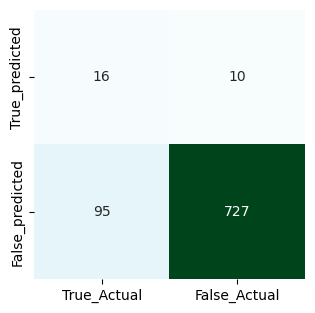

In [42]:
y_pred=clf.predict(x_test)
cmat=conf(y_test,y_pred)
cmat[0][0],cmat[1][1]=cmat[1][1],cmat[0][0]
cmat=pd.DataFrame(cmat,index=['True_predicted','False_predicted'],columns=['True_Actual','False_Actual'])
plt.subplots(figsize=(3.5,3.5))
sns.heatmap(cmat,cmap='BuGn',annot=True,fmt='.0f',cbar=False)
plt.show()

In [43]:
model.append('DTree')
ac.append(clf.score(x_test,y_test)*100)

# Fitting in Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_resample,y_train_resample)

RandomForestClassifier()

In [45]:
rf.score(x_test,y_test)*100

87.14622641509435

In [46]:
model.append('RandomForest')
ac.append(rf.score(x_test,y_test)*100)

In [47]:
from sklearn.model_selection import GridSearchCV

param={
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'criterion': ('gini', 'entropy')
}

In [48]:
grid_search = GridSearchCV(estimator=rf, param_grid=param).fit(x_train, y_train)
grid_search=pd.DataFrame(grid_search.cv_results_)
grid_search.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
mean_fit_time,0.130623,0.261191,0.129453,0.254801,0.154947,0.306188,0.157688,0.308345,0.130744,0.262014,0.133245,0.266619,0.163885,0.32773,0.165889,0.331019
std_fit_time,0.00227,0.005128,0.001318,0.007419,0.001459,0.002561,0.001332,0.00186,0.000464,0.005792,0.003124,0.009625,0.001326,0.004918,0.002139,0.004469
mean_score_time,0.011073,0.02156,0.010946,0.018743,0.011175,0.019887,0.011427,0.019875,0.010558,0.019011,0.010752,0.019114,0.011316,0.020222,0.011976,0.020626
std_score_time,0.000446,0.003849,0.000458,0.000336,0.000138,0.000062,0.000218,0.000355,0.000104,0.000578,0.000267,0.000648,0.000099,0.000224,0.000525,0.000558
param_criterion,gini,gini,gini,gini,gini,gini,gini,gini,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy
param_max_depth,3,3,3,3,5,5,5,5,3,3,3,3,5,5,5,5
param_min_samples_split,2,2,5,5,2,2,5,5,2,2,5,5,2,2,5,5
param_n_estimators,50,100,50,100,50,100,50,100,50,100,50,100,50,100,50,100
params,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...","{'criterion': 'gini', 'max_depth': 3, 'min_sam...","{'criterion': 'gini', 'max_depth': 3, 'min_sam...","{'criterion': 'gini', 'max_depth': 3, 'min_sam...","{'criterion': 'gini', 'max_depth': 5, 'min_sam...","{'criterion': 'gini', 'max_depth': 5, 'min_sam...","{'criterion': 'gini', 'max_depth': 5, 'min_sam...","{'criterion': 'gini', 'max_depth': 5, 'min_sam...","{'criterion': 'entropy', 'max_depth': 3, 'min_...","{'criterion': 'entropy', 'max_depth': 3, 'min_...","{'criterion': 'entropy', 'max_depth': 3, 'min_...","{'criterion': 'entropy', 'max_depth': 3, 'min_...","{'criterion': 'entropy', 'max_depth': 5, 'min_...","{'criterion': 'entropy', 'max_depth': 5, 'min_...","{'criterion': 'entropy', 'max_depth': 5, 'min_...","{'criterion': 'entropy', 'max_depth': 5, 'min_..."
split0_test_score,0.842183,0.842183,0.842183,0.842183,0.843658,0.845133,0.843658,0.843658,0.842183,0.842183,0.842183,0.842183,0.843658,0.843658,0.842183,0.843658


### Confusion Matrix:

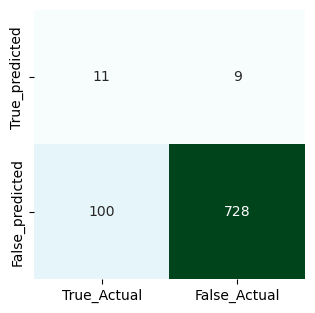

In [49]:
y_pred=rf.predict(x_test)
cmat=conf(y_test,y_pred)
cmat[0][0],cmat[1][1]=cmat[1][1],cmat[0][0]
cmat=pd.DataFrame(cmat,index=['True_predicted','False_predicted'],columns=['True_Actual','False_Actual'])
plt.subplots(figsize=(3.5,3.5))
sns.heatmap(cmat,cmap='BuGn',annot=True,fmt='.0f',cbar=False)
plt.show()

# Fitting in KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train_resample,y_train_resample)

KNeighborsClassifier()

In [51]:
knn.score(x_test,y_test)*100

83.25471698113208

In [52]:
model.append('KNN')
ac.append(knn.score(x_test,y_test)*100)

### Confusion Matrix:

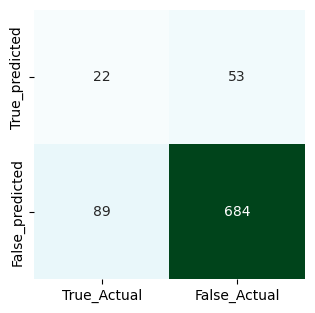

In [53]:
y_pred=knn.predict(x_test)
cmat=conf(y_test,y_pred)
cmat[0][0],cmat[1][1]=cmat[1][1],cmat[0][0]
cmat=pd.DataFrame(cmat,index=['True_predicted','False_predicted'],columns=['True_Actual','False_Actual'])
plt.subplots(figsize=(3.5,3.5))
sns.heatmap(cmat,cmap='BuGn',annot=True,fmt='.0f',cbar=False)
plt.show()

### Hyperparameter Tuning:

In [54]:
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

grid={
    'n_neighbors': [1,2,3,4,5],
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree'],
    'metric': ['manhattan','euclidian','minkowski']
}

In [55]:
gr = GridSearchCV(estimator=knn, param_grid=grid).fit(x_train_resample, y_train_resample)
gr=pd.DataFrame(gr.cv_results_)
gr.T

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
mean_fit_time,0.00675,0.005989,0.005969,0.006039,0.006104,0.006171,0.006152,0.005943,0.006115,0.006283,...,0.006049,0.006016,0.005951,0.005926,0.006015,0.006074,0.006085,0.005908,0.006163,0.005988
std_fit_time,0.001361,0.000117,0.00004,0.000147,0.000124,0.000206,0.000143,0.000043,0.000296,0.00033,...,0.000068,0.000085,0.000043,0.000046,0.000114,0.000194,0.000146,0.000074,0.000254,0.000106
mean_score_time,0.032846,0.016669,0.035906,0.019575,0.037946,0.022225,0.039222,0.022763,0.039954,0.023783,...,0.026397,0.010326,0.02814,0.011799,0.029421,0.012826,0.029783,0.013407,0.030959,0.014161
std_score_time,0.000658,0.000332,0.000704,0.000319,0.000546,0.000297,0.001579,0.001017,0.000461,0.000456,...,0.000605,0.000168,0.000419,0.000335,0.000673,0.000155,0.000296,0.000162,0.000683,0.000063
param_algorithm,auto,auto,auto,auto,auto,auto,auto,auto,auto,auto,...,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree
param_metric,manhattan,manhattan,manhattan,manhattan,manhattan,manhattan,manhattan,manhattan,manhattan,manhattan,...,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski
param_n_neighbors,1,1,2,2,3,3,4,4,5,5,...,1,1,2,2,3,3,4,4,5,5
param_weights,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,...,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...",...,"{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'..."
split0_test_score,0.805594,0.805594,0.806993,0.805594,0.78042,0.79021,0.788811,0.802797,0.783217,0.8,...,0.779021,0.779021,0.801399,0.779021,0.776224,0.79021,0.793007,0.794406,0.781818,0.801399


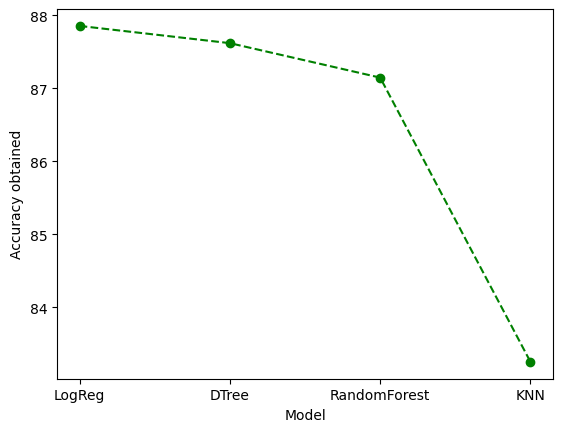

In [56]:
plt.plot(model,ac,'go--')
plt.xlabel('Model')
plt.ylabel('Accuracy obtained')
plt.show()